In [15]:
from utils import *
import numpy as np
from models.softmax import SoftmaxRegressionScratch
from data_module import SyntheticRegressionData, Data, FashionMNIST
import torch
from trainer import Trainer
import time

In [16]:
data = FashionMNIST(resize=(32, 32))
len(data.train), len(data.val)

(60000, 10000)

$32 \times 32$ pixels

$c \times h \times w$ tensor
* $c:$ number of color channel (1: grayscale)
* $h:$ height
* $w:$ width

In [17]:
data.train[0][0].shape

torch.Size([1, 32, 32])

In [18]:
X, y = next(iter(data.train_dataloader()))
print(X.shape, X.dtype, y.shape, y.dtype)

torch.Size([64, 1, 32, 32]) torch.float32 torch.Size([64]) torch.int64


In [19]:
tic = time.time()
for X, y in data.train_dataloader():
    continue
f'{time.time() - tic:.2f} sec'

'1.37 sec'

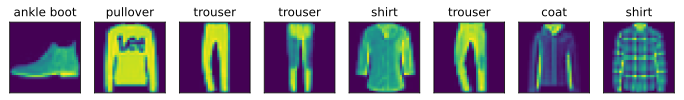

In [20]:
batch = next(iter(data.val_dataloader()))
data.visualize(batch)

In [21]:
X = torch.tensor([[1.0, 2.0, 3.0], [4.0, 5.0, 6.0]])
X.sum(0, keepdims=True), X.sum(1, keepdims=True)

(tensor([[5., 7., 9.]]),
 tensor([[ 6.],
         [15.]]))

In [22]:
# Softmax function

def softmax(X):
    X_exp = torch.exp(X)
    partition = X_exp.sum(1, keepdims=True)
    return X_exp / partition  # The broadcasting mechanism is applied here

In [23]:
X = torch.rand((2, 5)) # random 2x5 matrix

print(X)
X_prob = softmax(X)


print(X_prob)
print(X_prob.sum(1)) # sum row

tensor([[0.6143, 0.3204, 0.0719, 0.2359, 0.3583],
        [0.5508, 0.4716, 0.9282, 0.9375, 0.9080]])
tensor([[0.2641, 0.1969, 0.1536, 0.1809, 0.2045],
        [0.1591, 0.1470, 0.2321, 0.2343, 0.2275]])
tensor([1., 1.])


In [24]:
y = torch.tensor([0, 2])
y_hat = torch.tensor([[0.1, 0.3, 0.6], [0.3, 0.2, 0.5]])
y_hat[[0, 1], y]

tensor([0.1000, 0.5000])

In [25]:
def cross_entropy(y_hat, y):
    return -torch.log(y_hat[list(range(len(y_hat))), y]).mean()

cross_entropy(y_hat, y)

tensor(1.4979)

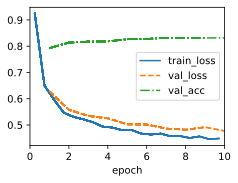

In [26]:
data = FashionMNIST(batch_size=256)
model = SoftmaxRegressionScratch(num_inputs=784, num_outputs=10, lr=0.1)
trainer = Trainer(max_epochs=10)
trainer.fit(model, data)

In [27]:
X, y = next(iter(data.val_dataloader()))
preds = model(X).argmax(axis=1)
preds.shape

torch.Size([256])

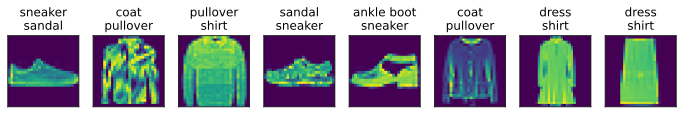

In [28]:
wrong = preds.type(y.dtype) != y
X, y, preds = X[wrong], y[wrong], preds[wrong]
labels = [a+'\n'+b for a, b in zip(
    data.text_labels(y), data.text_labels(preds))]
data.visualize([X, y], labels=labels)